# PyOAE - Example calculation of the sensitivity of $\eta$max and CO2 flux to the biological component of pCO2 in the global oceans

by Greg Pelletier, 31-Mar-2025

#### *Sensitivity of CO2 flux and $\eta$max to biological pCO2*

We evaluated the following two hypothetical scenarios in order to explore the sensitivity of the CO2 flux and $\eta$max to perturbations of the biological component of pCO2: 

- Scenario 1: assume that the monthly anomalies of pCO2_bio in each grid cell are 0.9 times the observed monthly anomalies
- Scenario 2: assume that the monthly anomalies of pCO2_bio in each grid cell are 1.1 times the observed monthly anomalies

We solved for the hypothetical pCO2 that would be present in each scenario with the following equations:

- pCO2_scen1 = pCO2_bio_scen1 + pCO2_atm + pCO2_T - pCO2_mean     (eqn 1)
- pCO2_scen2 = pCO2_bio_scen2 + pCO2_atm + pCO2_T - pCO2_mean     (eqn 2)
- pCO2_bio_scen1 = pCO2_bio_average + 0.9 * pCO2_bio_anom     (eqn 3)
- pCO2_bio_scen2 = pCO2_bio_average + 1.1 * pCO2_bio_anom     (eqn 4)
- pCO2_bio_anom = pCO2_bio - pCO2_bio_average     (eqn 5)

where

- pCO2_scen1 = hypothetical surface ocean pCO2 under Scenario 1
- pCO2_scen2 = hypothetical surface ocean pCO2 under Scenario 2
- pCO2_bio = biogeochemical/physical (aka "biological") component of pCO2 (explained below)
- pCO2_bio_average = arithmetic mean over time of pCO2_bio in each grid cell
- pCO2_bio_anom = monthly anomaly of pCO2_bio relative to pCO2_bio_average
- pCO2_atm = atmospheric pCO2 (estimated from SeaFlux)

Note that equations 1 and 2 are from equation 14 below.

For both Scenario 1 and 2 we calculated the resulting values of the sea-air CO2 flux and $\eta$max using either pCO2_scen1 or pCO2_scen2, combined with assuming that the TA, silicate, phospate, temperature, and salinity were equal to the observed values from OceanSODA-ETHZ.

The sea-air CO2 flux (FCO2) was estimated using the following equation with K0 (sol), kw, and ice from SeaFlux v2023 (Gregor, 2023):

FCO2 = K0 * kw * (pCO2_sea - pCO2_atm) * (1 - ice) * 1000 * 24 / 100     (eqn 6)

where 

- FCO2 = sea-air CO2 flux (mmol/m^2/day
- K0 (sol) = solubility of CO2 (mol/m^3/uatm)
- kw = gas transfer velocity (average of ERA5, JRA55, NCEP1) (cm/hr)
- pCO2_sea = seawater pCO2 (uatm)
- pCO2_atm = atmosphereic pCO2 (uatm)
- ice = fraction of water surface covered by ice (fraction)

#### *Thermal and non-thermal components of pCO2*

Variations in temperature can have a significant effect on pCO2 in seawater (Sarmiento and Gruber, 2006). Therefore, methods have been developed to separate the thermal and non-thermal components of the observed pCO2 (e.g. Takahashi et al 2002; Fassbender et al 2022).

In this notebook, we present a method to separate the non-thermal component of the pCO2 into atmospheric and biogeochemical/physical components. We will refer to the biogeoechemical/physical component as "biological" for simplicity. 

**Fassbender's method of estimating non-thermal and thermal components of pCO2**

We use the PyOAE function "pco2_fass" to apply Fassbender's method as described in Rodgers et al (2022). The first step is to calculate the long-term average pCO2 (pCO2_mean) using a carbonate system calculator (e.g. PyCO2SYS) using inputs of the long-term averages of alkalinity (TA_mean), dissolved inorganic carbon (DIC_mean), total silicate (SIO4_mean), total phosphate (PO4_mean), temperature (temp_mean), and salinity (sal_mean), as follows:

pCO2_mean = f(temp_mean, sal_mean, TA_mean, DIC_mean, SIO4_mean, PO4_mean)   (eqn 7)

where "f" is the carbonate system calculation function (e.g. PyCO2SYS).

The thermally-driven component of pCO2 (pCO2_T) is calculated using the time-varying temperature observations (temp_obs), combined with the long-term averages of the other inputs to PyCO2SYS as follows:

pCO2_T = f(temp_obs, sal_mean, TA_mean, DIC_mean, SIO4_mean, PO4_mean)   (eqn 8)

The thermal pCO2 component seasonal cycle anomaly (pCO2_Tanom) is estimated from the following equation:

pCO2_Tanom = pCO2_T - pCO2_mean     (eqn 9)

Finally, the non-thermal component of pCO2 (pCO2_NT) is estimated with the following equation:

pCO2_NT = pCO2_obs - pCO2_Tanom     (eqn 10)

Fassbender's method decomposes the observed pCO2 into the thermal and non-thermal components such that the following equation is applicable:

pCO2_obs = pCO2_NT + pCO2_T - pCO2_mean          (eqn 11)

#### *Biological and atmospheric components of pCO2*

The non-thermal component of the pCO2 of a given water mass is affected by air–sea gas exchange, and biogeochemical/physical processes, such as production/consumption of organic matter and mixing (analogous to the processes affecting the "biological" component of DIC described by Clargo et al 2015 and Burt et al, 2016). To isolate the biological (biogeochemical/physical) component of pCO2 (pCO2_bio), the atmospheric pCO2 (pCO2_atm) is removed from the non-thermal component of pCO2 (pCO2_NT) as follows: 

pCO2_bio = pCO2_NT – pCO2_atm				(eqn 12)

where 

- pCO2_NT = non-thermal component of pCO2 (OceanSODA-ETHZ using Fassbender's method)
- pCO2_atm = atmospheric pCO2 (SeaFlux)

Equation 12 is also equivalent to the following equation:

pCO2_NT = pCO2_bio + pCO2_atm				(eqn 13)

Substituting equation 13 into equation 11 results in the following equation for the decomposition of the surface ocean pCO2 into separate biogeochemical/physical ("biological"), atmospheric, and thermal components:

pCO2_obs = pCO2_bio + pCO2_atm + pCO2_T - pCO2_mean          (eqn 14)

In this notebook, we use the pCO2_NT calculated using Fassbender's method (Rodgers et al 2022), using 1982-2022 monthly observed surface ocean carbonate system variables and temperatures in the OceanSODA-ETHZ data set in each month at each grid
cell. We use the 1982-2022 monthly atmospheric pCO2_atm estimated from the SeaFlux atmospheric fCO2 data (adjusted by the fugacity factor using the PyOAE function fCO2_to_pCO2). Finally, we
calculated the 1982-2022 monthly values of "pCO2_bio" using eqn 12.

#### *OceanSODA-ETHZ and SeaFlux data used in this notebook*

In this example we use two netcdf files that we need to do the analysis, OceanSODA_ETHZ_for_PyOAE.nc and SeaFlux_for_PyOAE.nc, available to download at the following link:

https://drive.google.com/drive/folders/1BGgVRk2Gf6mxNnX1Fxg0Q4GtZSAYMzef?usp=sharing

#### *PyOAE functons pco2_fass, fCO2_to_pCO2, and etamax*

PyOAE includes functions to calculate thermal and non-thermal components of pCO2 using Takahashi's method (function pco2_tnorm), and using Fassbender's method (function pco2_fass). We convert the SeaFlux atmospheric fCO2 data to pCO2 using the fugacity estimated by the PyOAE fCO2_to_pCO2 function. We calcuated $\eta$max using the etamax function of PyOAE.

#### *References*

- Takahasi et al 2002 (http://dx.doi.org/10.1016/S0967-0645(02)00003-6)
- Rodgers et al 2022 (https://doi.org/10.1029/2023GB007798)
- Clargo et al 2015 (https://doi.org/10.1016/j.marchem.2015.08.010)
- Burt et al 2016 (https://doi.org/10.1002/lno.10243):
- Gregor 2023 (https://doi.org/10.5194/essd-13-4693-2021):


**Install or upgrade PyOAE**

Run one of the next commands if needed to either install PyOAE for the first time, or upgrade PyOAE to the latest version

In [5]:
# # Run the following command to install PyOAE for the first time
# !pip install git+https://github.com/gjpelletier/PyOAE.git

# # Run the following command to upgrade PyOAE to the latest version
# !pip install git+https://github.com/gjpelletier/PyOAE.git --upgrade

**Import the packages that are needed and read the data that will be used in this example, and make a matlab-style timer to measure how long it takes to perform calculations**

In [6]:
from PyOAE import pco2_fass, pco2_tnorm, nnn, sine_fit, etamax, fCO2_to_pCO2
import PyCO2SYS as pyco2
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import time
import scipy.io
import multiprocessing

**Read OceanSODA-ETHZ data**

In [7]:
# read netcdf file of OceanSODA-ETHZ data
ds1 = xr.open_dataset("OceanSODA_ETHZ_for_PyOAE.nc",chunks={"lon":60})
# Convert ds1 to dictionary of numpy arrays for computations
ds_dict = {var: ds1[var].values for var in ds1.data_vars}
# append yearfrac,lon,lat,time,pco2atm,fco2atm to ds_dict
ds_dict["yearfrac"] = ds1.yearfrac.values
ds_dict["x"] = ds1.x.values
ds_dict["y"] = ds1.y.values
ds_dict["time"] = ds1.time.values
# extract the dims
NT,NY,NX = ds_dict["talk"].shape

**Read SeaFlux data**

In [4]:
# read netcdf file of SeaFlux atmospheric pCO2
ds2 = xr.open_dataset("SeaFlux_for_PyOAE.nc",chunks={"lon":60})
ds_dict["fco2atm"] = ds2.fco2atm.values
ds_dict["sol"] = ds2.sol.values
ds_dict["kw"] = ds2.kw.values
ds_dict["ice"] = ds2.ice.values

**Define a matlab-style tic toc timer to measure how long the computations take**

In [18]:
# matlab-style tic toc timer
def TicTocGenerator():
    # Generator that returns time differences
    ti = 0           # initial time
    tf = time.time() # final time
    while True:
        ti = tf
        tf = time.time()
        yield tf-ti # returns the time difference

TicToc = TicTocGenerator() # create an instance of the TicTocGen generator

# This will be the main function through which we define both tic() and toc()
def toc(tempBool=True):
    # Prints the time difference yielded by generator instance TicToc
    tempTimeInterval = next(TicToc)
    if tempBool:
        print( "Elapsed time: %f seconds.\n" %tempTimeInterval )
    return

def tic():
    # Records a time in TicToc, marks the beginning of a time interval
    toc(False)

# Fassbender's method of estimating pCO2_T, pCO2_NT, and pCO2_Tanom

**Transpose and combine x and y into 1d for multiprocessing**

In [6]:
# transpose and reshape arrays
ds_dict_T = {}
ds_dict_T["yearfrac"] = ds1.yearfrac.values
ds_dict_T["talk"] = np.transpose(ds_dict['talk'],(2,1,0)).reshape(NX*NY,NT)
ds_dict_T["dic"] = np.transpose(ds_dict['dic'],(2,1,0)).reshape(NX*NY,NT)
ds_dict_T["temperature"] = np.transpose(ds_dict['temperature'],(2,1,0)).reshape(NX*NY,NT)
ds_dict_T["salinity"] = np.transpose(ds_dict['salinity'],(2,1,0)).reshape(NX*NY,NT)
ds_dict_T["sio3"] = np.transpose(ds_dict['sio3'],(2,1,0)).reshape(NX*NY,NT)
ds_dict_T["po4"] = np.transpose(ds_dict['po4'],(2,1,0)).reshape(NX*NY,NT)
ds_dict_T["ph_total"] = np.transpose(ds_dict['ph_total'],(2,1,0)).reshape(NX*NY,NT)
# ds_dict_T["pco2atm"] = np.transpose(ds_dict['pco2atm'],(2,1,0)).reshape(NX*NY,NT)
ds_dict_T["fco2atm"] = np.transpose(ds_dict['fco2atm'],(2,1,0)).reshape(NX*NY,NT)
# initialize new output arrays
ds_dict_T["pco2_obs"] = np.full((NX*NY,NT), np.nan)
ds_dict_T["pco2_T_fass"] = np.full((NX*NY,NT), np.nan)
ds_dict_T["pco2_Tanom_fass"] = np.full((NX*NY,NT), np.nan)
ds_dict_T["pco2_NT_fass"] = np.full((NX*NY,NT), np.nan)
ds_dict_T["pco2_mean_fass"] = np.full((NX*NY), np.nan)

**Define the function that will calculate pCO2_T, pCO2_NT, and pCO2_Tanom during the multiprocessing loop**

In [7]:
# define the function to find the root in each grid cell i
def find_fass(i):
    kwargs = {
        'alkalinity': ds_dict_T["talk"][i,:],
        'dic': ds_dict_T["dic"][i,:],
        'total_silicate': ds_dict_T["sio3"][i,:],
        'total_phosphate': ds_dict_T["po4"][i,:],
        'temperature': ds_dict_T["temperature"][i,:],
        'salinity': ds_dict_T["salinity"][i,:],
        'total_pressure': 0,
        'opt_pH_scale': 1,  # pH scale (1= total scale)
        'opt_k_carbonic': 10,  # Choice of H2CO3 and HCO3- K1 and K2 (10= Lueker et al 2000)
        'opt_k_bisulfate': 1,  # Choice of HSO4- dissociation constant KSO4 (1= Dickson)
        'opt_total_borate': 1,  # Choice for boron:sal 
        'opt_k_fluoride': 1   # Choice for fluoride
        }
    # nnn = number of non-nan values for each input variable to dic_bio         
    nnn_talk = np.count_nonzero(~np.isnan(kwargs["alkalinity"]))  # number of non-nan
    nnn_dic = np.count_nonzero(~np.isnan(kwargs["dic"]))  # number of non-nan
    nnn_sio3 = np.count_nonzero(~np.isnan(kwargs["total_silicate"]))  # number of non-nan
    nnn_po4 = np.count_nonzero(~np.isnan(kwargs["total_phosphate"]))  # number of non-nan
    nnn_temp = np.count_nonzero(~np.isnan(kwargs["temperature"]))  # number of non-nan
    nnn_sal = np.count_nonzero(~np.isnan(kwargs["salinity"]))  # number of non-nan
    if (nnn_talk==nnn_dic and nnn_talk==nnn_sio3 and 
        nnn_talk==nnn_po4 and nnn_talk==nnn_temp and nnn_talk==nnn_sal and nnn_talk > 0):
        # solve for dic_bio = dic_obs - dic_atm
        result = pco2_fass(**kwargs)
        output = {
            'i': i,
            'result': result
            }
        return output

**The next step uses multiprocessing and takes about half an hour to loop through all grid cells to calculate the thermal and non-thermal components of pCO2 using Fassbender's method**

In [8]:
# parallel processing loop through all grid cells
print('Computing pCO2_T, pCO2_NT, and pCO2_Tanom, please wait ...')
tic()
ncpu = 6   # number of CPU cores to use for parallel processing
with multiprocessing.Pool(processes=ncpu) as pool:    
    # Use imap_unordered to apply the function to a range of numbers
    results = pool.imap_unordered(find_fass, range(NX*NY))    
    # Iterate over the results as they become available
    for result in results:
        if result is not None:
            i = int(result['i'])
            ds_dict_T["pco2_obs"][i,:]= result['result']["pCO2_obs"]
            ds_dict_T["pco2_mean_fass"][i]= result['result']["pCO2_mean"]
            ds_dict_T["pco2_T_fass"][i,:]= result['result']["pCO2_T"]
            ds_dict_T["pco2_Tanom_fass"][i,:]= result['result']["pCO2_Tanom"]
            ds_dict_T["pco2_NT_fass"][i,:]= result['result']["pCO2_NT"]
            # print("i in loop: ",i) 
print('Done')
toc()

Computing pCO2_T, pCO2_NT, and pCO2_Tanom, please wait ...
Done
Elapsed time: 1690.387424 seconds.



**Reshape and transpose outputs back to original shape of inputs**

In [9]:
ds_dict["pco2_obs"] = np.reshape(ds_dict_T['pco2_obs'],(NX,NY,NT)).transpose(2,1,0)
ds_dict["pco2_T_fass"] = np.reshape(ds_dict_T['pco2_T_fass'],(NX,NY,NT)).transpose(2,1,0)
ds_dict["pco2_Tanom_fass"] = np.reshape(ds_dict_T['pco2_Tanom_fass'],(NX,NY,NT)).transpose(2,1,0)
ds_dict["pco2_NT_fass"] = np.reshape(ds_dict_T['pco2_NT_fass'],(NX,NY,NT)).transpose(2,1,0)
ds_dict["pco2_mean_fass"] = np.reshape(ds_dict_T['pco2_mean_fass'],(NX,NY)).transpose(1,0)

# Estimating the biogeochemical/physical component of pCO2

Next, we estimate the biogeochemical/physical component of pCO2 using the the following equation:

pCO2_bio = pCO2_NT - pCO2_atm

**Convert atmospheric fCO2 from SeaFlux into atmospheric pCO2**

In [11]:
ds_dict['pco2_atm'] = fCO2_to_pCO2(ds_dict['fco2atm'],ds_dict['temperature'])

**Check the atmospheric pCO2 calculated from fCO2 in SeaFlux v2023 compared with the atmospheric pCO2 in SeaFlux v2021**

In [12]:
# normalized root mean squared difference between v2021 pCO2_atm vs pCO2_atm converted from v2023 fCO2_atm
ds_dict["pco2_atm_SeaFlux_v2021"] = ds2.pco2atm.values
dif_pco2 = ds_dict['pco2_atm'] - ds_dict['pco2_atm_SeaFlux_v2021']
nrmse_pco2 = np.sqrt(np.nanmean(dif_pco2 ** 2)) / np.nanmean(ds_dict["pco2_atm_SeaFlux_v2021"]) * 100
print("NRMSD comparing SeaFlux_v2021 pCO2_atm vs pCO2_atm converted from SeaFlux_v2023 fCO2_atm: ",round(nrmse_pco2,2),"%")

NRMSD comparing SeaFlux_v2021 pCO2_atm vs pCO2_atm converted from SeaFlux_v2023 fCO2_atm:  0.17 %


**Calculate pCO2_bio**

In [13]:
ds_dict['pco2_bio_tak'] = ds_dict['pco2_NT_tak'] - ds_dict["pco2_atm"]
ds_dict['pco2_bio_fass'] = ds_dict['pco2_NT_fass'] - ds_dict["pco2_atm"]

# Calculate the hypothetical pCO2 for Scenario 1 and 2

We evaluated the following two hypothetical scenarios in order to explore the sensitivity of the CO2 flux and $\eta$max to perturbations of the biological component of pCO2: 

- Scenario 1: assume that the monthly anomalies of pCO2_bio in each grid cell are 0.9 times the observed monthly anomalies
- Scenario 2: assume that the monthly anomalies of pCO2_bio in each grid cell are 1.1 times the observed monthly anomalies

We solved for the hypothetical pCO2 that would be present in each scenario with the following equations:

- pCO2_scen1 = pCO2_bio_scen1 + pCO2_atm + pCO2_T - pCO2_mean     (eqn 1)
- pCO2_scen2 = pCO2_bio_scen2 + pCO2_atm + pCO2_T - pCO2_mean     (eqn 2)
- pCO2_bio_scen1 = pCO2_bio_average + 0.9 * pCO2_bio_anom     (eqn 3)
- pCO2_bio_scen2 = pCO2_bio_average + 1.1 * pCO2_bio_anom     (eqn 4)
- pCO2_bio_anom = pCO2_bio - pCO2_bio_average     (eqn 5)

where

- pCO2_scen1 = hypothetical surface ocean pCO2 under Scenario 1
- pCO2_scen2 = hypothetical surface ocean pCO2 under Scenario 2
- pCO2_bio = biogeochemical/physical (aka "biological") component of pCO2 (explained below)
- pCO2_bio_average = arithmetic mean over time of pCO2_bio in each grid cell
- pCO2_bio_anom = monthly anomaly of pCO2_bio relative to pCO2_bio_average
- pCO2_atm = atmospheric pCO2 (estimated from SeaFlux)

For both Scenario 1 and 2 we calculated the resulting values of the sea-air CO2 flux and $\eta$max using either pCO2_scen1 or pCO2_scen2, combined with assuming that the TA, silicate, phospate, temperature, and salinity were equal to the observed values from OceanSODA-ETHZ.


**Calculate the arithmetic mean (average) and monthly anomalies of pCO2_bio** 

In [12]:
ds_dict["pco2_bio_average"] = np.mean(ds_dict["pco2_bio_fass"], axis=0)
ds_dict["pco2_bio_anom"] = ds_dict["pco2_bio_fass"] - ds_dict["pco2_bio_average"]

**Calculate pCO2_bio and pCO2 for scenario 1 and 2 using the scaled monthly anomalies of pCO2_bio**

In [13]:
# pCO2_bio for scenario 1 and 2
ds_dict["pco2_bio_scen1"] = ds_dict["pco2_bio_average"] + 0.9 * ds_dict["pco2_bio_anom"]
ds_dict["pco2_bio_scen2"] = ds_dict["pco2_bio_average"] + 1.1 * ds_dict["pco2_bio_anom"]

# pCO2 for scenario 1 and 2
ds_dict["pco2_scen1"] = ds_dict["pco2_T_fass"] + ds_dict["pco2_atm"] + ds_dict["pco2_bio_scen1"] - ds_dict["pco2_mean_fass"]       
ds_dict["pco2_scen2"] = ds_dict["pco2_T_fass"] + ds_dict["pco2_atm"] + ds_dict["pco2_bio_scen2"] - ds_dict["pco2_mean_fass"]    

# Save ds_dict and ds_dict_T as mat files

Next we will save the results so far in a mat file. This will allow us to begin from this step to continue the analysis if it is necessary to restart the analysis

In [14]:
import scipy.io

# uncomment one of the lines below to either save or load a at file of results

# Save the results in ds_dict to a mat file 
# scipy.io.savemat('PyOAE_with_pCO2_bio_sensitivity_ds_dict_v04.mat', ds_dict)
# scipy.io.savemat('PyOAE_with_pCO2_bio_sensitivity_ds_dict_T_v04.mat', ds_dict_T)

# load previously saved mat file into ds_dict
# ds_dict = scipy.io.loadmat('PyOAE_with_pCO2_bio_sensitivity_ds_dict_v04.mat')
# ds_dict_T = scipy.io.loadmat('PyOAE_with_pCO2_bio_sensitivity_ds_dict_T_v04.mat')

# Solve for the $\eta$max and CO2 system variables

Next we will solve for the maximum theoretical OAE efficiency ($\eta$max) for the following scenarios:

- Observed condtions (represented by observed pCO2, TA, silicate, phosphate, temperature, and salinity)
- Scenario 1 (use pCO2_scen1 assuming 0.9 times the anomaly of pCO2_bio)
- Scenario 2 (use pCO2_scen2 assuming 1.1 times the anomaly of pCO2_bio)

In addition to solving for the $\eta$max, we will also solve for the Ωara, CO3--, and pH under each scenario and for unperturbed observed conditions.

**Transpose and reshape pCO2_scen1 and pCO2_scen2 for use in multiprocessing to solve for the CO2 system**

In [15]:
ds_dict_T["pco2_scen1"] = np.transpose(ds_dict['pco2_scen1'],(2,1,0)).reshape(NX*NY,NT)
ds_dict_T["pco2_scen2"] = np.transpose(ds_dict['pco2_scen2'],(2,1,0)).reshape(NX*NY,NT)
# initialize new output arrays
ds_dict_T["dic_scen1"] = np.full((NX*NY,NT), np.nan)
ds_dict_T["dic_scen2"] = np.full((NX*NY,NT), np.nan)
ds_dict_T["etamax_obs"] = np.full((NX*NY,NT), np.nan)
ds_dict_T["etamax_scen1"] = np.full((NX*NY,NT), np.nan)
ds_dict_T["etamax_scen2"] = np.full((NX*NY,NT), np.nan)
ds_dict_T["phtot_obs"] = np.full((NX*NY,NT), np.nan)
ds_dict_T["phtot_scen1"] = np.full((NX*NY,NT), np.nan)
ds_dict_T["phtot_scen2"] = np.full((NX*NY,NT), np.nan)
ds_dict_T["omara_obs"] = np.full((NX*NY,NT), np.nan)
ds_dict_T["omara_scen1"] = np.full((NX*NY,NT), np.nan)
ds_dict_T["omara_scen2"] = np.full((NX*NY,NT), np.nan)
ds_dict_T["co3_obs"] = np.full((NX*NY,NT), np.nan)
ds_dict_T["co3_scen1"] = np.full((NX*NY,NT), np.nan)
ds_dict_T["co3_scen2"] = np.full((NX*NY,NT), np.nan)

**Define the function that will solve for the DIC for scenario 1 and 2 using PyCO2SYS**

In [16]:
# define the function to find the root in each grid cell i
def find_dic(i):
    if WhichScenario == 'scenario_1':
        pCO2 = ds_dict_T["pco2_scen1"][i,:]
    elif WhichScenario == 'scenario_2':
        pCO2 = ds_dict_T["pco2_scen2"][i,:]
    kwargs = dict(
        par1_type = 1,  # The first parameter supplied is of type "1", which means "alkalinity"
        par1 = ds_dict_T["talk"][i,:],  # value of the first parameter
        par2_type = 4,  # The second parameter 2=DIC, 4=pCO2, 5=fCO2
        par2 = pCO2,  # value of the second parameter
        total_silicate = ds_dict_T["sio3"][i,:],  # Concentration of silicate  in the sample (in umol/kg)
        total_phosphate = ds_dict_T["po4"][i,:],  # Concentration of phosphate in the sample (in umol/kg)
        temperature = ds_dict_T["temperature"][i,:],  # Temperature at input conditions
        salinity = ds_dict_T["salinity"][i,:],  # Salinity of the sample
        pressure = np.zeros((NT)),  # Pressure    at input conditions
        opt_pH_scale = 1,  # Choice of pH scale
        opt_k_carbonic = 10,  # Choice of H2CO3 and HCO3- dissociation constants
        opt_k_bisulfate = 1,  # Choice of HSO4- dissociation constant KSO4
        opt_total_borate = 2,  # Choice of boron:sal
        opt_k_fluoride = 2   # Choice of hydrogen fluoride dissociation constant
        )
    # nnn = number of non-nan values for each input variable to dic_bio         
    nnn_talk = np.count_nonzero(~np.isnan(kwargs["par1"]))  # number of non-nan
    nnn_pco2 = np.count_nonzero(~np.isnan(kwargs["par2"]))  # number of non-nan
    nnn_sio3 = np.count_nonzero(~np.isnan(kwargs["total_silicate"]))  # number of non-nan
    nnn_po4 = np.count_nonzero(~np.isnan(kwargs["total_phosphate"]))  # number of non-nan
    nnn_temp = np.count_nonzero(~np.isnan(kwargs["temperature"]))  # number of non-nan
    nnn_sal = np.count_nonzero(~np.isnan(kwargs["salinity"]))  # number of non-nan
    # print("i in f: ",i) 
    if (nnn_talk==nnn_pco2 and nnn_talk==nnn_sio3 and 
        nnn_talk==nnn_po4 and nnn_talk==nnn_temp and nnn_talk==nnn_sal and nnn_talk > 0):
        # solve for dic
        results = pyco2.sys(**kwargs)
        dic = results['dic']
        output = {
            'i': i,
            'dic': dic
            }       
        return output

**Multiprocessing loop to calculate the DIC for scenario 1 and 2**

In [19]:
print('Computing DIC for scenario 1, please wait ...')
# specify which scenario DIC is to be used (observed, scenario_1, or scenario_2)
WhichScenario = 'scenario_1'
# parallel processing loop through all grid cells
tic()
ncpu = 6   # number of CPU cores to use for parallel processing
with multiprocessing.Pool(processes=ncpu) as pool:    
    # Use imap_unordered to apply the function to a range of numbers
    results = pool.imap_unordered(find_dic, range(NX*NY))    
    # Iterate over the results as they become available
    for result in results:
        if result is not None:
            i = int(result['i'])
            ds_dict_T["dic_scen1"][i,:]= result["dic"]
            # print(i,result) 
print('Done')
toc()

print('Computing DIC for scenario 2, please wait ...')
# specify which scenario DIC is to be used (observed, scenario_1, or scenario_2)
WhichScenario = 'scenario_2'
# parallel processing loop through all grid cells
tic()
ncpu = 6   # number of CPU cores to use for parallel processing
with multiprocessing.Pool(processes=ncpu) as pool:    
    # Use imap_unordered to apply the function to a range of numbers
    results = pool.imap_unordered(find_dic, range(NX*NY))    
    # Iterate over the results as they become available
    for result in results:
        if result is not None:
            i = int(result['i'])
            ds_dict_T["dic_scen2"][i,:]= result["dic"]
            # print(i,result) 
print('Done')
toc()

Computing DIC for scenario 1, please wait ...
Done
Elapsed time: 597.898866 seconds.

Computing DIC for scenario 2, please wait ...
Done
Elapsed time: 600.849713 seconds.



In [20]:
# save interim results in case we need to start again from this step
# scipy.io.savemat('PyOAE_with_pCO2_bio_sensitivity_ds_dict_T_v04.mat', ds_dict_T)

**Define the function that will solve for etamax and the carbonate system at each time step**

In [21]:
# define the function to find the root in each grid cell i
def find_etamax(i):
    dTA = 1
    if WhichScenario == 'observed':
        DIC_ctl = ds_dict_T["dic"][i,:]
    elif WhichScenario == 'scenario_1':
        DIC_ctl = ds_dict_T["dic_scen1"][i,:]
    elif WhichScenario == 'scenario_2':
        DIC_ctl = ds_dict_T["dic_scen2"][i,:]
    kwargs = {
        'DIC_ctl': DIC_ctl, 
        'TA_ctl': ds_dict_T["talk"][i,:], 
        'SiO3_ctl': ds_dict_T["sio3"][i,:], 
        'PO4_ctl': ds_dict_T["po4"][i,:], 
        'Temp_ctl': ds_dict_T["temperature"][i,:], 
        'Sal_ctl': ds_dict_T["salinity"][i,:], 
        'Pres_ctl': np.zeros((NT))
        }
        # nnn = number of non-nan values for each input variable to dic_bio         
    nnn_talk = np.count_nonzero(~np.isnan(kwargs["TA_ctl"]))  # number of non-nan
    nnn_dic = np.count_nonzero(~np.isnan(kwargs["DIC_ctl"]))  # number of non-nan
    nnn_sio3 = np.count_nonzero(~np.isnan(kwargs["SiO3_ctl"]))  # number of non-nan
    nnn_po4 = np.count_nonzero(~np.isnan(kwargs["PO4_ctl"]))  # number of non-nan
    nnn_temp = np.count_nonzero(~np.isnan(kwargs["Temp_ctl"]))  # number of non-nan
    nnn_sal = np.count_nonzero(~np.isnan(kwargs["Sal_ctl"]))  # number of non-nan
    # print("i in f: ",i) 
    if (nnn_talk==nnn_dic and nnn_talk==nnn_sio3 and 
        nnn_talk==nnn_po4 and nnn_talk==nnn_temp and nnn_talk==nnn_sal and nnn_talk > 0):
        # solve for dic_bio = dic_obs - dic_atm
        result = etamax(dTA, **kwargs)
        output = {
            'i': i,
            'result': result
            }       
        return output

**Compute $\eta$max and other carbonate system variables for observed conditions, Scenario 1, and Scenario 2**

Next we will compute the $\eta$max and other carbonate system variables for the observed conditions, Scenario 1, and Scenario 2. These computations take about 20 minutes for each scenario using multiprocessing with 6 CPUs, for a total of about one hour for the next block of code.

In [22]:
print('Computing etamax for observed conditions, please wait ...')
# specify which scenario DIC is to be used (observed, scenario_1, or scenario_2)
WhichScenario = 'observed'
# parallel processing loop through all grid cells
tic()
ncpu = 6   # number of CPU cores to use for parallel processing
with multiprocessing.Pool(processes=ncpu) as pool:    
    # Use imap_unordered to apply the function to a range of numbers
    results = pool.imap_unordered(find_etamax, range(NX*NY))    
    # Iterate over the results as they become available
    for result in results:
        if result is not None:
            i = int(result['i'])
            ds_dict_T["etamax_obs"][i,:]= result["result"]["etamax"]
            # ds_dict_T["pco2_obs"][i,:]= result["result"]["pCO2_ctl"]
            ds_dict_T["phtot_obs"][i,:]= result["result"]["pHtotal_ctl"]
            ds_dict_T["omara_obs"][i,:]= result["result"]["OmegaAra_ctl"]
            ds_dict_T["co3_obs"][i,:]= result["result"]["CO3_ctl"]
            # print(i,result) 
print('Done')
toc()

print('Computing etamax for scenario 1, please wait ...')
# specify which scenario DIC is to be used (observed, scenario_1, or scenario_2)
WhichScenario = 'scenario_1'
# parallel processing loop through all grid cells
tic()
ncpu = 6   # number of CPU cores to use for parallel processing
with multiprocessing.Pool(processes=ncpu) as pool:    
    # Use imap_unordered to apply the function to a range of numbers
    results = pool.imap_unordered(find_etamax, range(NX*NY))    
    # Iterate over the results as they become available
    for result in results:
        if result is not None:
            i = int(result['i'])
            ds_dict_T["etamax_scen1"][i,:]= result["result"]["etamax"]
            # ds_dict_T["pco2_scen1"][i,:]= result["result"]["pCO2_ctl"]
            ds_dict_T["phtot_scen1"][i,:]= result["result"]["pHtotal_ctl"]
            ds_dict_T["omara_scen1"][i,:]= result["result"]["OmegaAra_ctl"]
            ds_dict_T["co3_scen1"][i,:]= result["result"]["CO3_ctl"]
            # print(i,result) 
print('Done')
toc()

print('Computing etamax for scenario 2, please wait ...')
# specify which scenario DIC is to be used (observed, scenario_1, or scenario_2)
WhichScenario = 'scenario_2'
# parallel processing loop through all grid cells
tic()
ncpu = 6   # number of CPU cores to use for parallel processing
with multiprocessing.Pool(processes=ncpu) as pool:    
    # Use imap_unordered to apply the function to a range of numbers
    results = pool.imap_unordered(find_etamax, range(NX*NY))    
    # Iterate over the results as they become available
    for result in results:
        if result is not None:
            i = int(result['i'])
            ds_dict_T["etamax_scen2"][i,:]= result["result"]["etamax"]
            # ds_dict_T["pco2_scen2"][i,:]= result["result"]["pCO2_ctl"]
            ds_dict_T["phtot_scen2"][i,:]= result["result"]["pHtotal_ctl"]
            ds_dict_T["omara_scen2"][i,:]= result["result"]["OmegaAra_ctl"]
            ds_dict_T["co3_scen2"][i,:]= result["result"]["CO3_ctl"]
            # print(i,result) 
print('Done')
toc()

Computing etamax for observed conditions, please wait ...
Done
Elapsed time: 1190.173042 seconds.

Computing etamax for scenario 1, please wait ...
Done
Elapsed time: 1213.355115 seconds.

Computing etamax for scenario 2, please wait ...
Done
Elapsed time: 1190.296762 seconds.



In [23]:
# save the interim results in case it is necessary to restart from this step
# scipy.io.savemat('PyOAE_with_pCO2_bio_sensitivity_ds_dict_T_v04.mat', ds_dict_T)

# Calculate CO2 flux sensitivity to pCO2_bio

**Define a function to calculate CO2 flux between air and water**

In [24]:
def CO2_flux(pCO2_sea, pCO2_atm, K0, kw, ice):
    """
    CO2 flux using inputs of K0 (sol), kw, and ice from SeaFlux v2023 
    INPUT
    pCO2_sea = seawater pCO2 (uatm)
    pCO2_atm = atmospheric pCO2 (uatm)
    K0 = solubility of CO2 (mol/m3/uatm)
    kw = gas transfer velocity (cm/hr) (use average of ERA5, JRA55, and NCEP1)
    ice = fraction of water surface covered by ice
    OUTPUT
    FCO2 = CO2 flux between air and water (mmol/m2/day)
    """
    FCO2 = K0 * kw * (pCO2_sea - pCO2_atm) * (1 - ice) * 1000 * 24 / 100    
    return FCO2

**Reshape and transpose outputs**

In [25]:
# reshape and transpose outputs into the original ds_dict shapes
ds_dict["dic_scen1"] = np.reshape(ds_dict_T['dic_scen1'],(NX,NY,NT)).transpose(2,1,0)
ds_dict["dic_scen2"] = np.reshape(ds_dict_T['dic_scen2'],(NX,NY,NT)).transpose(2,1,0)
ds_dict["etamax_obs"] = np.reshape(ds_dict_T['etamax_obs'],(NX,NY,NT)).transpose(2,1,0)
ds_dict["etamax_scen1"] = np.reshape(ds_dict_T['etamax_scen1'],(NX,NY,NT)).transpose(2,1,0)
ds_dict["etamax_scen2"] =np.reshape(ds_dict_T['etamax_scen2'],(NX,NY,NT)).transpose(2,1,0)
ds_dict["phtot_obs"] = np.reshape(ds_dict_T['phtot_obs'],(NX,NY,NT)).transpose(2,1,0)
ds_dict["phtot_scen1"] = np.reshape(ds_dict_T['phtot_scen1'],(NX,NY,NT)).transpose(2,1,0)
ds_dict["phtot_scen2"] = np.reshape(ds_dict_T['phtot_scen2'],(NX,NY,NT)).transpose(2,1,0)
ds_dict["omara_obs"] = np.reshape(ds_dict_T['omara_obs'],(NX,NY,NT)).transpose(2,1,0)
ds_dict["omara_scen1"] = np.reshape(ds_dict_T['omara_scen1'],(NX,NY,NT)).transpose(2,1,0)
ds_dict["omara_scen2"] = np.reshape(ds_dict_T['omara_scen2'],(NX,NY,NT)).transpose(2,1,0)
ds_dict["co3_obs"] = np.reshape(ds_dict_T['co3_obs'],(NX,NY,NT)).transpose(2,1,0)
ds_dict["co3_scen1"] = np.reshape(ds_dict_T['co3_scen1'],(NX,NY,NT)).transpose(2,1,0)
ds_dict["co3_scen2"] = np.reshape(ds_dict_T['co3_scen2'],(NX,NY,NT)).transpose(2,1,0)

**Calculate CO2 fluxes**

We will use the average kw based on ERA5, JRA55, and NCEP1 consistent with the methods described in the metadata for OceanSODA-ETHZ

In [28]:
tic()

ds_dict["FCO2_obs"] = CO2_flux(
    ds_dict["pco2_obs"], 
    ds_dict["pco2_atm"],
    ds_dict["sol"],
    np.nanmean(ds_dict['kw'][0:3,:,:,:],0),
    ds_dict["ice"]
    )

ds_dict["FCO2_scen1"] = CO2_flux(
    ds_dict["pco2_scen1"], 
    ds_dict["pco2_atm"],
    ds_dict["sol"],
    np.nanmean(ds_dict['kw'][0:3,:,:,:],0),
    ds_dict["ice"]
    )

ds_dict["FCO2_scen2"] = CO2_flux(
    ds_dict["pco2_scen2"], 
    ds_dict["pco2_atm"],
    ds_dict["sol"],
    np.nanmean(ds_dict['kw'][0:3,:,:,:],0),
    ds_dict["ice"]
    )

toc()    

/tmp/ipykernel_7564/3372692927.py:7: RuntimeWarning: Mean of empty slice
  np.nanmean(ds_dict['kw'][0:3,:,:,:],0),
/tmp/ipykernel_7564/3372692927.py:15: RuntimeWarning: Mean of empty slice
  np.nanmean(ds_dict['kw'][0:3,:,:,:],0),
/tmp/ipykernel_7564/3372692927.py:23: RuntimeWarning: Mean of empty slice
  np.nanmean(ds_dict['kw'][0:3,:,:,:],0),


Elapsed time: 3.585565 seconds.



**Save outputs as mat files**

In [206]:
# save the interim results so far in case it is necessary to restart from this step
scipy.io.savemat('PyOAE_with_pCO2_bio_sensitivity_ds_dict_v04.mat', ds_dict)
scipy.io.savemat('PyOAE_with_pCO2_bio_sensitivity_ds_dict_T_v04.mat', ds_dict_T)

# load previously saved mat file into ds_dict
# ds_dict = scipy.io.loadmat('PyOAE_with_pCO2_bio_sensitivity_ds_dict_v04.mat')
# ds_dict_T = scipy.io.loadmat('PyOAE_with_pCO2_bio_sensitivity_ds_dict_T_v04.mat')

# Make time series plot at a selected location

Below are the results of the sensitivity analysis showing the following figures for a selected location near the Columbia River:

- Figure 1 shows the components of pCO2 under the observed conditions

- Figure 2 shows (a) the pCO2_bio under observed conditions, scenario 1, and scenario 2, and (b) the difference in pCO2_bio between (scenario 1 - observed) and (scenario 2 - observed). I also calculated the normalized root mean square differences normalized to the standard deviations of the observed pCO2_bio. Note that the perturbations of +/- 10% of the anomalies of pCO2_bio correspond to NRMSD of about +/- 11% for each scenario compared with the standard devations of the observed pCO2_bio at the selected location

- Figure 3 shows (a) the sea-air flux of CO2 for the observed conditions, scenario 1, and scenario 2, and (b)  the difference in CO2 flux between (scenario 1 - observed) and (scenario 2 - observed). Note that the perturbations of +/- 10% of the anomalies of pCO2_bio correspond to NRMSD of about +/- 13% for each scenario compared with the standard deviations of the observed CO2 flux at the selected location. In other words, the CO2 flux sensitivity is about the same magnitude as the perturbations of pCO2_bio. Also note that at the Columbia River location the CO2 flux values are negative, which means that there is net transfer of CO2 from the atmosphere into seawater at this location because the seawater pCO2 is lower than the atmospheric pCO2.

- Figure 4 shows (a) the etamax for the observed conditions, scenario 1, and scenario 2, and (b)  the difference in etamax between (scenario 1 - observed) and (scenario 2 - observed). Note that the perturbations of +/- 10% of the anomalies of pCO2_bio correspond to NRMSD of about +/- 4% for each scenario compared with the standard deviations of the observed etamax at the selected location. 


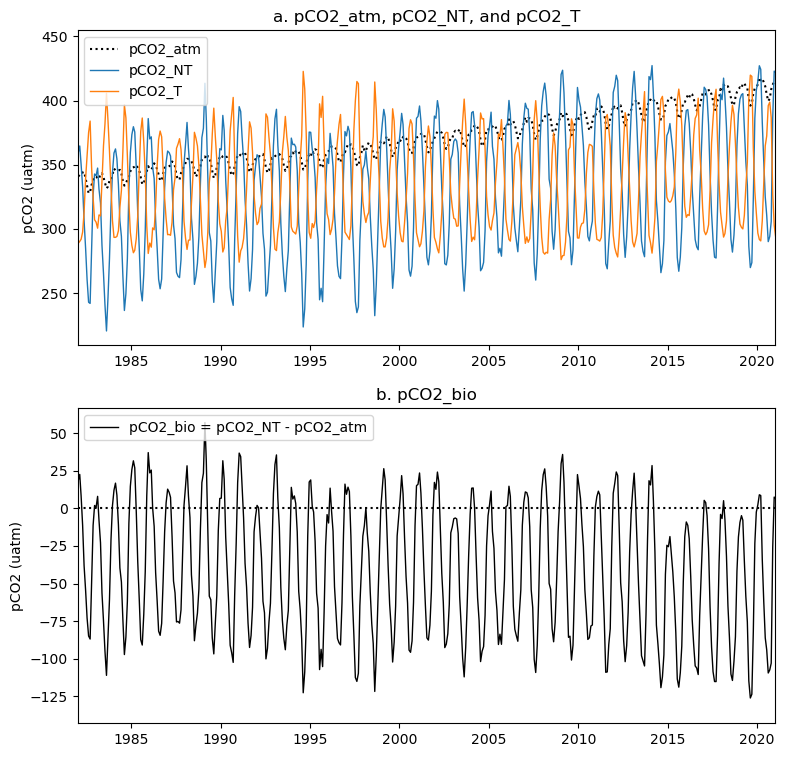

In [170]:
# Figure 1. Components of pCO2 under the observed conditions
# Columbia River location i,j coordinates
i=234
j=136
fig, ax = plt.subplot_mosaic(
    '''
    A
    B
    ''',
    figsize = (9, 9)
    # constrained_layout = True
)

# Plot at ['A']
ax['A'].plot(ds_dict["yearfrac"].flatten(), ds_dict["pco2_atm"][:,j,i], label='pCO2_atm', color='k', linestyle=':', marker='', linewidth=1.5)
ax['A'].plot(ds_dict["yearfrac"].flatten(), ds_dict["pco2_NT_fass"][:,j,i], label='pCO2_NT', linestyle='-', marker='', linewidth=1)
ax['A'].plot(ds_dict["yearfrac"].flatten(), ds_dict["pco2_T_fass"][:,j,i], label='pCO2_T', linestyle='-', marker='', linewidth=1)
# ax['A'].set_xlabel('year')
ax['A'].set_ylabel('pCO2 (uatm)')
ax['A'].legend(loc='upper left')
# ax['A'].grid(True)
ax['A'].set_title('a. pCO2_atm, pCO2_NT, and pCO2_T')
# ax['A'].set_xlim(2010, 2021)
ax['A'].set_xlim(1982, 2021)
# ax['A'].set_ylim(1850, 2085)
# ax['A'].text(1983, 36.5, 'Mean: '+f"{A_fit:.1f}"+', Amplitude: '+f"{B_fit:.1f}"+', RMSE: '+f"{rmse:.1f}"+' umol/kg',
#         fontsize=10, color='black', ha='left', va='center')
# ax['A'].axhline(y=0, color='k', linestyle=':')

# Plot at ['b']
ax['B'].plot(ds_dict["yearfrac"].flatten(), ds_dict["pco2_bio_fass"][:,j,i], label='pCO2_bio = pCO2_NT - pCO2_atm', color='k', linestyle='-', marker='', linewidth=1)
# ax['B'].set_xlabel('year')
ax['B'].set_ylabel('pCO2 (uatm)')
ax['B'].legend(loc='upper left')
# ax['B'].grid(True)
ax['B'].set_title('b. pCO2_bio')
# ax['B'].set_xlim(2010, 2021)
ax['B'].set_xlim(1982, 2021)
# ax['B'].set_ylim(1850, 2085)
ax['B'].axhline(y=0, color='k', linestyle=':')

fig.savefig('Fig1_pCO2_T_NT_bio_atm_at_ColumbiaRiver_1982_2020_v04.png', format='png', dpi=300);

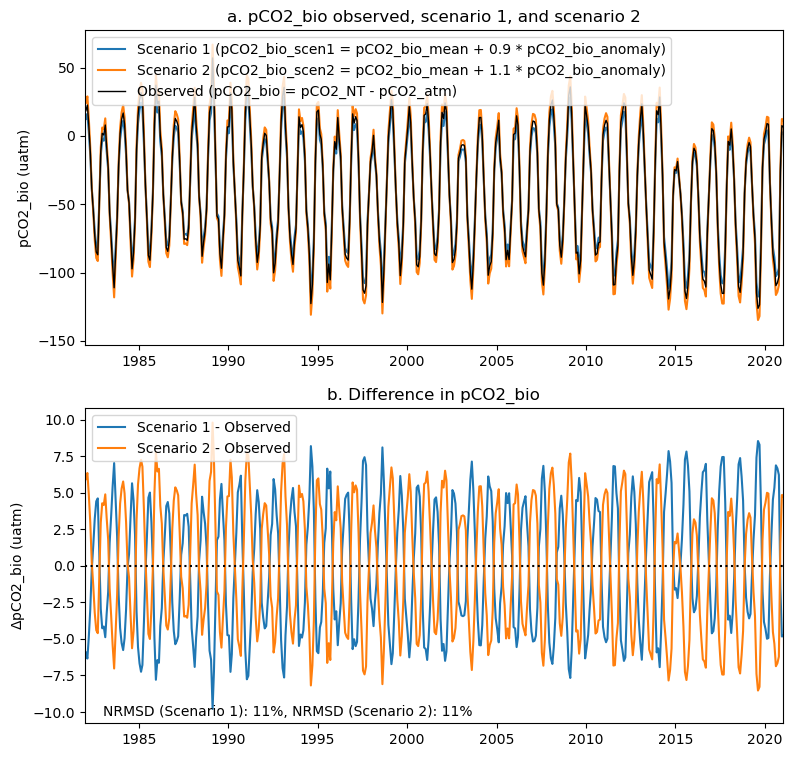

In [177]:
# Figure 2. pCO2_bio under observed conditions, scenario 1, and scenario 2.
# Columbia River location i,j coordinates
i=234
j=136
fig, ax = plt.subplot_mosaic(
    '''
    A
    B
    ''',
    figsize = (9, 9)
    # constrained_layout = True
)

# Plot at ['A']
ax['A'].plot(ds_dict["yearfrac"].flatten(), ds_dict["pco2_bio_scen1"][:,j,i], label='Scenario 1 (pCO2_bio_scen1 = pCO2_bio_mean + 0.9 * pCO2_bio_anomaly)', linestyle='-')
ax['A'].plot(ds_dict["yearfrac"].flatten(), ds_dict["pco2_bio_scen2"][:,j,i], label='Scenario 2 (pCO2_bio_scen2 = pCO2_bio_mean + 1.1 * pCO2_bio_anomaly)', linestyle='-')
ax['A'].plot(ds_dict["yearfrac"].flatten(), ds_dict["pco2_bio_fass"][:,j,i], label='Observed (pCO2_bio = pCO2_NT - pCO2_atm)', color='k', linestyle='-', marker='', linewidth=1)
# ax['A'].set_xlabel('year')
ax['A'].set_ylabel('pCO2_bio (uatm)')
ax['A'].legend(loc='upper left')
# ax['A'].grid(True)
ax['A'].set_title('a. pCO2_bio observed, scenario 1, and scenario 2')
# ax['A'].set_xlim(2010, 2021)
ax['A'].set_xlim(1982, 2021)
# ax['A'].set_ylim(1850, 2085)
# ax['A'].text(1983, 36.5, 'Mean: '+f"{A_fit:.1f}"+', Amplitude: '+f"{B_fit:.1f}"+', RMSE: '+f"{rmse:.1f}"+' umol/kg',
#         fontsize=10, color='black', ha='left', va='center')
# ax['A'].axhline(y=0, color='k', linestyle=':')

# Plot at ['b']
dif_scen1 = ds_dict["pco2_bio_scen1"][:,j,i] - ds_dict["pco2_bio_fass"][:,j,i]
dif_scen2 = ds_dict["pco2_bio_scen2"][:,j,i] - ds_dict["pco2_bio_fass"][:,j,i]
nrmse_scen1 = np.sqrt(np.mean(dif_scen1 ** 2)) / abs(np.nanstd(ds_dict["pco2_bio_fass"])) * 100
nrmse_scen2 = np.sqrt(np.mean(dif_scen2 ** 2)) / abs(np.nanstd(ds_dict["pco2_bio_fass"])) * 100
ax['B'].plot(ds_dict["yearfrac"].flatten(), dif_scen1, label='Scenario 1 - Observed', linestyle='-')
ax['B'].plot(ds_dict["yearfrac"].flatten(), dif_scen2, label='Scenario 2 - Observed', linestyle='-')
# ax['B'].set_xlabel('year')
ax['B'].set_ylabel(r'$\Delta$pCO2_bio (uatm)')
ax['B'].legend(loc='upper left')
# ax['B'].grid(True)
ax['B'].set_title('b. Difference in pCO2_bio')
# ax['B'].set_xlim(2010, 2021)
ax['B'].set_xlim(1982, 2021)
# ax['B'].set_ylim(1850, 2085)
ax['B'].text(1983, -10, 'NRMSD (Scenario 1): '+f"{nrmse_scen1:.0f}"+'%, NRMSD (Scenario 2): '+f"{nrmse_scen2:.0f}"+'%',
        fontsize=10, color='black', ha='left', va='center')
ax['B'].axhline(y=0, color='k', linestyle=':')

fig.savefig('Fig2_pCO2bio_obs_scen1_scen2_at_ColumbiaRiver_1982_2020_v04.png', format='png', dpi=300);

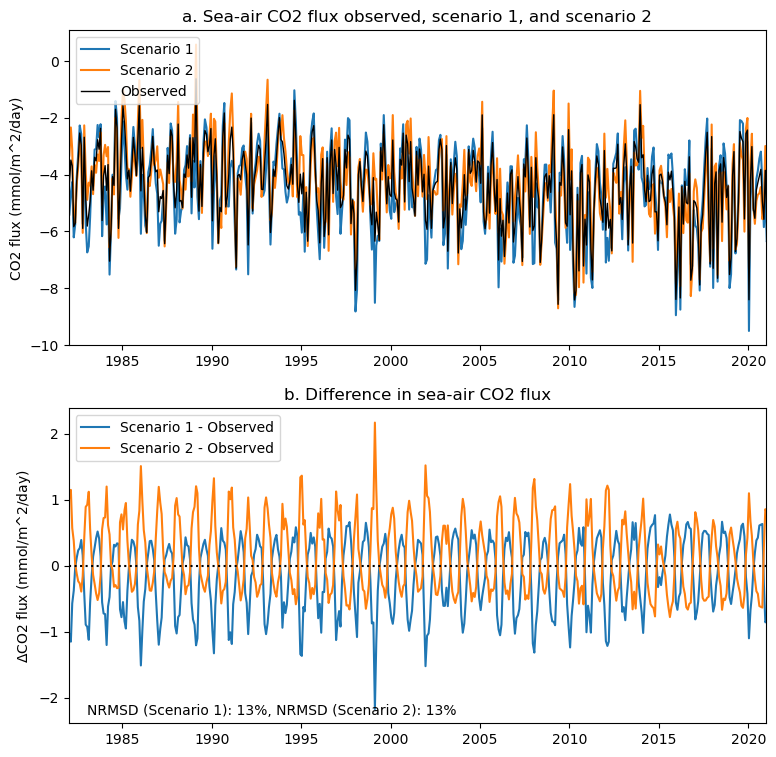

In [178]:
# Figure 3. Sea-air CO2 flux under observed conditions, scenario 1, and scenario 2.
# Columbia River location i,j coordinates
i=234
j=136
fig, ax = plt.subplot_mosaic(
    '''
    A
    B
    ''',
    figsize = (9, 9)
    # constrained_layout = True
)

# Plot at ['A']
ax['A'].plot(ds_dict["yearfrac"].flatten(), ds_dict["FCO2_scen1"][:,j,i], label='Scenario 1', linestyle='-')
ax['A'].plot(ds_dict["yearfrac"].flatten(), ds_dict["FCO2_scen2"][:,j,i], label='Scenario 2', linestyle='-')
ax['A'].plot(ds_dict["yearfrac"].flatten(), ds_dict["FCO2_obs"][:,j,i], label='Observed', color='k', linestyle='-', marker='', linewidth=1)
# ax['A'].set_xlabel('year')
ax['A'].set_ylabel('CO2 flux (mmol/m^2/day)')
ax['A'].legend(loc='upper left')
# ax['A'].grid(True)
ax['A'].set_title('a. Sea-air CO2 flux observed, scenario 1, and scenario 2')
# ax['A'].set_xlim(2010, 2021)
ax['A'].set_xlim(1982, 2021)
# ax['A'].set_ylim(1850, 2085)
# ax['A'].text(1983, 36.5, 'Mean: '+f"{A_fit:.1f}"+', Amplitude: '+f"{B_fit:.1f}"+', RMSE: '+f"{rmse:.1f}"+' umol/kg',
#         fontsize=10, color='black', ha='left', va='center')
# ax['A'].axhline(y=0, color='k', linestyle=':')

# Plot at ['A']

dif_scen1 = ds_dict["FCO2_scen1"][:,j,i] - ds_dict["FCO2_obs"][:,j,i]
dif_scen2 = ds_dict["FCO2_scen2"][:,j,i] - ds_dict["FCO2_obs"][:,j,i]
nrmse_scen1 = np.sqrt(np.mean(dif_scen1 ** 2)) / abs(np.nanstd(ds_dict["FCO2_obs"])) * 100
nrmse_scen2 = np.sqrt(np.mean(dif_scen2 ** 2)) / abs(np.nanstd(ds_dict["FCO2_obs"])) * 100
ax['B'].plot(ds_dict["yearfrac"].flatten(), dif_scen1, label='Scenario 1 - Observed', linestyle='-')
ax['B'].plot(ds_dict["yearfrac"].flatten(), dif_scen2, label='Scenario 2 - Observed', linestyle='-')
# ax['B'].set_xlabel('year')
ax['B'].set_ylabel(r'$\Delta$CO2 flux (mmol/m^2/day)')
ax['B'].legend(loc='upper left')
# ax['B'].grid(True)
ax['B'].set_title('b. Difference in sea-air CO2 flux')
# ax['B'].set_xlim(2010, 2021)
ax['B'].set_xlim(1982, 2021)
# ax['B'].set_ylim(1850, 2085)
ax['B'].text(1983, -2.2, 'NRMSD (Scenario 1): '+f"{nrmse_scen1:.0f}"+'%, NRMSD (Scenario 2): '+f"{nrmse_scen2:.0f}"+'%',
        fontsize=10, color='black', ha='left', va='center')
ax['B'].axhline(y=0, color='k', linestyle=':')

fig.savefig('Fig3_FCO2_obs_scen1_scen2_at_ColumbiaRiver_1982_2020_v04.png', format='png', dpi=300);

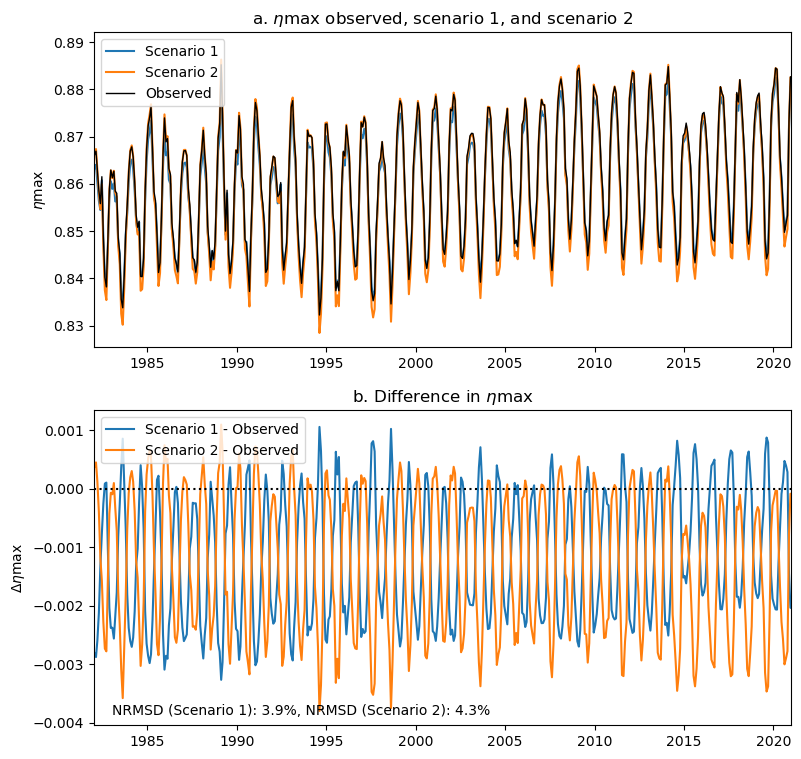

In [176]:
# Figure 4. etamax under observed conditions, scenario 1, and scenario 2.
# Columbia River location i,j coordinates
i=234
j=136
fig, ax = plt.subplot_mosaic(
    '''
    A
    B
    ''',
    figsize = (9, 9)
    # constrained_layout = True
)

# Plot at ['A']
ax['A'].plot(ds_dict["yearfrac"].flatten(), ds_dict["etamax_scen1"][:,j,i], label='Scenario 1', linestyle='-')
ax['A'].plot(ds_dict["yearfrac"].flatten(), ds_dict["etamax_scen2"][:,j,i], label='Scenario 2', linestyle='-')
ax['A'].plot(ds_dict["yearfrac"].flatten(), ds_dict["etamax_obs"][:,j,i], label='Observed', color='k', linestyle='-', marker='', linewidth=1)
# ax['A'].set_xlabel('year')
ax['A'].set_ylabel(r'$\eta$max')
ax['A'].legend(loc='upper left')
# ax['A'].grid(True)
ax['A'].set_title(r'a. $\eta$max observed, scenario 1, and scenario 2')
# ax['A'].set_xlim(2010, 2021)
ax['A'].set_xlim(1982, 2021)
# ax['A'].set_ylim(1850, 2085)
# ax['A'].text(1983, 36.5, 'Mean: '+f"{A_fit:.1f}"+', Amplitude: '+f"{B_fit:.1f}"+', RMSE: '+f"{rmse:.1f}"+' umol/kg',
#         fontsize=10, color='black', ha='left', va='center')
# ax['A'].axhline(y=0, color='k', linestyle=':')

# Plot at ['A']

dif_scen1 = ds_dict["etamax_scen1"][:,j,i] - ds_dict["etamax_obs"][:,j,i]
dif_scen2 = ds_dict["etamax_scen2"][:,j,i] - ds_dict["etamax_obs"][:,j,i]
nrmse_scen1 = 100 * np.sqrt(np.mean(dif_scen1 ** 2)) / np.nanstd(ds_dict["etamax_obs"]) 
nrmse_scen2 = 100 * np.sqrt(np.mean(dif_scen2 ** 2)) / np.nanstd(ds_dict["etamax_obs"]) 
ax['B'].plot(ds_dict["yearfrac"].flatten(), dif_scen1, label='Scenario 1 - Observed', linestyle='-')
ax['B'].plot(ds_dict["yearfrac"].flatten(), dif_scen2, label='Scenario 2 - Observed', linestyle='-')
# ax['B'].set_xlabel('year')
ax['B'].set_ylabel(r'$\Delta\eta$max')
ax['B'].legend(loc='upper left')
# ax['B'].grid(True)
ax['B'].set_title(r'b. Difference in $\eta$max')
# ax['B'].set_xlim(2010, 2021)
ax['B'].set_xlim(1982, 2021)
# ax['B'].set_ylim(1850, 2085)
ax['B'].text(1983, -0.0038, 'NRMSD (Scenario 1): '+f"{nrmse_scen1:.1f}"+'%, NRMSD (Scenario 2): '+f"{nrmse_scen2:.1f}"+'%',
        fontsize=10, color='black', ha='left', va='center')
ax['B'].axhline(y=0, color='k', linestyle=':')

fig.savefig('Fig4_etamax_vs_pCO2bio_obs_scen1_scen2_at_ColumbiaRiver_1982_2020_v04.png', format='png', dpi=300);

# Maps of the NRMSD comparing scenarios vs observed

## **Maps for CO2 flux**

Maps of the following outputs for sea-air CO2 flux in the global oceans:

- **Observed values between 1982-2022**
    - mean
    - standard deviation
- **Scenario 1**: Normalized Root Mean Square Differences between Scenario 1 vs observed (normalized to the standard deviations of observed values)
- **Scenario 2**: Normalized Root Mean Square Differences between Scenario 2 vs observed (normalized to the standard deviations of observed values) 

In [184]:
# NRMSD of (scenario vs observed)
dif_scen1 = ds_dict["FCO2_scen1"] - ds_dict["FCO2_obs"]
dif_scen2 = ds_dict["FCO2_scen2"] - ds_dict["FCO2_obs"]
rmse_scen1 = np.sqrt(np.nanmean(dif_scen1 ** 2, 0))   # RMSD across time dim
rmse_scen2 = np.sqrt(np.nanmean(dif_scen2 ** 2, 0))
mean_obs = abs(np.nanmean(ds_dict["FCO2_obs"],0))   # mean of obs across time dim
std_obs = abs(np.nanstd(ds_dict["FCO2_obs"],0))   # mean of obs across time dim
nrmse_scen1 = rmse_scen1 / std_obs * 100   # % NRMSD across time dim
nrmse_scen2 = rmse_scen2 / std_obs * 100

/tmp/ipykernel_7564/583662033.py:4: RuntimeWarning: Mean of empty slice
  rmse_scen1 = np.sqrt(np.nanmean(dif_scen1 ** 2, 0))   # RMSD across time dim
/tmp/ipykernel_7564/583662033.py:5: RuntimeWarning: Mean of empty slice
  rmse_scen2 = np.sqrt(np.nanmean(dif_scen2 ** 2, 0))
/tmp/ipykernel_7564/583662033.py:6: RuntimeWarning: Mean of empty slice
  mean_obs = abs(np.nanmean(ds_dict["FCO2_obs"],0))   # mean of obs across time dim
/home/greg/miniconda3/envs/ipynb/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


/tmp/ipykernel_7564/1619578799.py:7: RuntimeWarning: Mean of empty slice
  Z = np.nanmean(ds_dict["FCO2_obs"],0)


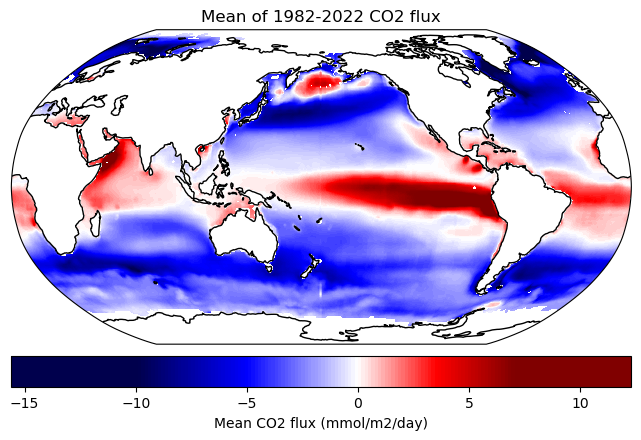

In [185]:
# Figure 5a: Mean of observed values from 1982-2022
# Robinson map of the sine-regression mean values of DIC_bio
import cartopy.crs as ccrs
from matplotlib.colors import TwoSlopeNorm
plt.figure(figsize=(8, 5))
X = np.squeeze(ds_dict['x'])
Y = np.squeeze(ds_dict['y'])
Z = np.nanmean(ds_dict["FCO2_obs"],0)
# Define the zero point
vmin = np.nanpercentile(Z,1)
vmax = np.nanpercentile(Z,99)
vcenter = 0.0
# Create a normalization instance
norm = TwoSlopeNorm(vmin=vmin, vcenter=vcenter, vmax=vmax)
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.coastlines()
# ax.gridlines()
plt.title(r'Mean of 1982-2022 CO2 flux')
plt.contourf(X,Y,Z,cmap='seismic',levels=256,transform=ccrs.PlateCarree(), norm=norm);
plt.colorbar(orientation="horizontal", pad=0.03,label='Mean CO2 flux (mmol/m2/day)',ticks=[-15,-10,-5,0,5,10,15]);
plt.savefig('Fig5a_map_of_CO2_flux_mean_v04.png', format='png', dpi=300)
plt.show()

/home/greg/miniconda3/envs/ipynb/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


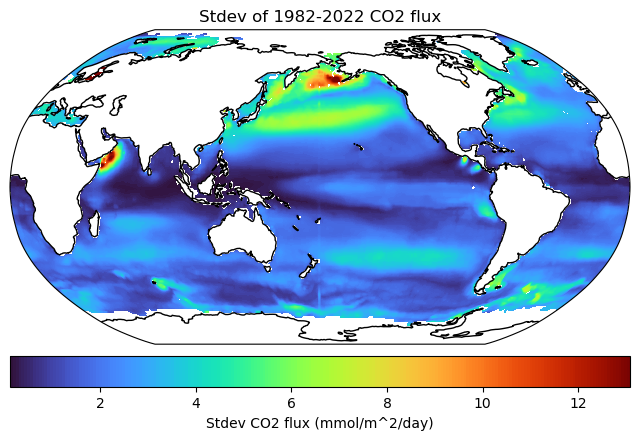

In [186]:
# Figure 5b: Standard deviation of observed values from 1982-2022
# Robinson map of the sine-regression amplitude values of pCO2_bio
import cartopy.crs as ccrs

plt.figure(figsize=(8, 5))
X = np.squeeze(ds_dict['x'])
Y = np.squeeze(ds_dict['y'])
# Z = nrmse_scen1.copy()
Z = np.nanstd(ds_dict["FCO2_obs"],0)
# Z = ds_dict["FCO2_scen1"][0,:,:]
# cosmetic trim of the extreme tails of Z for better color contrast in the map plot
zmin = np.nanpercentile(Z,0.1)
zmax = np.nanpercentile(Z,99.9)
Z[Z<zmin]=zmin
Z[Z>zmax]=zmax
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.coastlines()
# ax.gridlines()
plt.title('Stdev of 1982-2022 CO2 flux')
# plt.contourf(X,Y,Z,cmap='turbo',levels=256,vmin=zmin,vmax=zmax,transform=ccrs.PlateCarree());
plt.contourf(X,Y,Z,cmap='turbo',levels=256,transform=ccrs.PlateCarree());
# plt.colorbar(orientation="horizontal", pad=0.03,label='NRMSD CO2 flux (%)',ticks=[0,25,50,75,100,125,150,175,200]);
plt.colorbar(orientation="horizontal", pad=0.03,label='Stdev CO2 flux (mmol/m^2/day)',ticks=[0,2,4,6,8,10,12]);
plt.savefig('Fig5b_map_of_CO2_flux_stdev_v04.png', format='png', dpi=300)
plt.show()

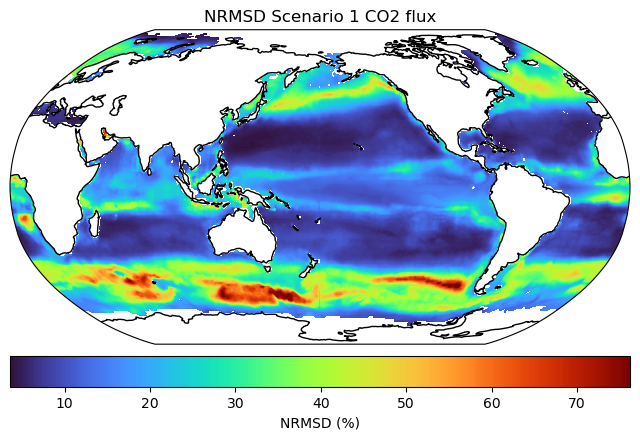

In [187]:
# Figure 5c: NRMSD of Scenario 1
# Robinson map of the sine-regression amplitude values of pCO2_bio
import cartopy.crs as ccrs

plt.figure(figsize=(8, 5))
X = np.squeeze(ds_dict['x'])
Y = np.squeeze(ds_dict['y'])
# Z = nrmse_scen1.copy()
Z = nrmse_scen1.copy()
# Z = ds_dict["FCO2_scen1"][0,:,:]
# cosmetic trim of the extreme tails of Z for better color contrast in the map plot
zmin = np.nanpercentile(Z,0.1)
zmax = np.nanpercentile(Z,99.9)
Z[Z<zmin]=zmin
Z[Z>zmax]=zmax
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.coastlines()
# ax.gridlines()
plt.title('NRMSD Scenario 1 CO2 flux')
# plt.contourf(X,Y,Z,cmap='turbo',levels=256,vmin=zmin,vmax=zmax,transform=ccrs.PlateCarree());
plt.contourf(X,Y,Z,cmap='turbo',levels=256,transform=ccrs.PlateCarree());
# plt.colorbar(orientation="horizontal", pad=0.03,label='NRMSD CO2 flux (%)',ticks=[0,25,50,75,100,125,150,175,200]);
plt.colorbar(orientation="horizontal", pad=0.03,label='NRMSD (%)',ticks=[0,10,20,30,40,50,60,70,80,90,100]);
plt.savefig('Fig5c_map_of_CO2_flux_NRMSD_scen1_v04.png', format='png', dpi=300)
plt.show()

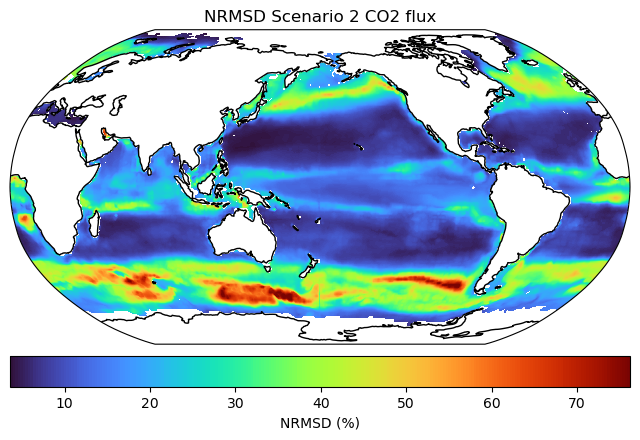

In [188]:
# Figure 5d: NRMSD of Scenario 2
# Robinson map of the sine-regression amplitude values of pCO2_bio
import cartopy.crs as ccrs

plt.figure(figsize=(8, 5))
X = np.squeeze(ds_dict['x'])
Y = np.squeeze(ds_dict['y'])
# Z = nrmse_scen1.copy()
Z = nrmse_scen2.copy()
# Z = ds_dict["FCO2_scen1"][0,:,:]
# cosmetic trim of the extreme tails of Z for better color contrast in the map plot
zmin = np.nanpercentile(Z,0.1)
zmax = np.nanpercentile(Z,99.9)
Z[Z<zmin]=zmin
Z[Z>zmax]=zmax
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.coastlines()
# ax.gridlines()
plt.title('NRMSD Scenario 2 CO2 flux')
# plt.contourf(X,Y,Z,cmap='turbo',levels=256,vmin=zmin,vmax=zmax,transform=ccrs.PlateCarree());
plt.contourf(X,Y,Z,cmap='turbo',levels=256,transform=ccrs.PlateCarree());
# plt.colorbar(orientation="horizontal", pad=0.03,label='NRMSD CO2 flux (%)',ticks=[0,25,50,75,100,125,150,175,200]);
plt.colorbar(orientation="horizontal", pad=0.03,label='NRMSD (%)',ticks=[0,10,20,30,40,50,60,70,80,90,100]);
plt.savefig('Fig5d_map_of_CO2_flux_NRMSD_scen2_v04.png', format='png', dpi=300)
plt.show()

## **Maps for $\eta$max**

Maps of the following outputs for $\eta$max in the global oceans:

- **Observed values between 1982-2022**
    - mean
    - standard deviation
- **Scenario 1**: Normalized Root Mean Square Differences between Scenario 1 vs observed (normalized to the standard deviations of observed values)
- **Scenario 2**: Normalized Root Mean Square Differences between Scenario 2 vs observed (normalized to the standard deviations of observed values) 

In [190]:
# NRMSD of (scenario vs observed)
dif_scen1 = ds_dict["etamax_scen1"] - ds_dict["etamax_obs"]
dif_scen2 = ds_dict["etamax_scen2"] - ds_dict["etamax_obs"]
rmse_scen1 = np.sqrt(np.nanmean(dif_scen1 ** 2, 0))   # RMSD across time dim
rmse_scen2 = np.sqrt(np.nanmean(dif_scen2 ** 2, 0))
mean_obs = abs(np.nanmean(ds_dict["etamax_obs"],0))   # mean of obs across time dim
std_obs = abs(np.nanstd(ds_dict["etamax_obs"],0))   # mean of obs across time dim
nrmse_scen1 = rmse_scen1 / std_obs * 100   # % NRMSD across time dim
nrmse_scen2 = rmse_scen2 / std_obs * 100

/tmp/ipykernel_7564/3474341571.py:4: RuntimeWarning: Mean of empty slice
  rmse_scen1 = np.sqrt(np.nanmean(dif_scen1 ** 2, 0))   # RMSD across time dim
/tmp/ipykernel_7564/3474341571.py:5: RuntimeWarning: Mean of empty slice
  rmse_scen2 = np.sqrt(np.nanmean(dif_scen2 ** 2, 0))
/tmp/ipykernel_7564/3474341571.py:6: RuntimeWarning: Mean of empty slice
  mean_obs = abs(np.nanmean(ds_dict["etamax_obs"],0))   # mean of obs across time dim
/home/greg/miniconda3/envs/ipynb/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


/tmp/ipykernel_7564/875912806.py:8: RuntimeWarning: Mean of empty slice
  Z = np.nanmean(ds_dict["etamax_obs"],0)


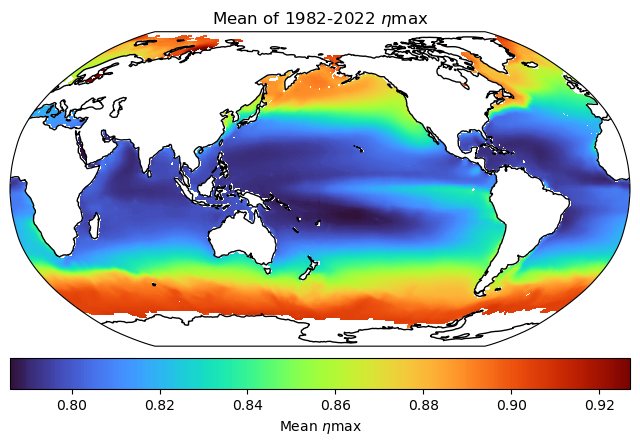

In [200]:
# Figure 6a: Means of observed values from 1982-2022
# Robinson map of the sine-regression amplitude values of pCO2_bio
import cartopy.crs as ccrs

plt.figure(figsize=(8, 5))
X = np.squeeze(ds_dict['x'])
Y = np.squeeze(ds_dict['y'])
# Z = nrmse_scen1.copy()
Z = np.nanmean(ds_dict["etamax_obs"],0)
# Z = ds_dict["FCO2_scen1"][0,:,:]
# cosmetic trim of the extreme tails of Z for better color contrast in the map plot
zmin = np.nanpercentile(Z,0.1)
zmax = np.nanpercentile(Z,99.9)
Z[Z<zmin]=zmin
Z[Z>zmax]=zmax
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.coastlines()
# ax.gridlines()
plt.title(r'Mean of 1982-2022 $\eta$max')
# plt.contourf(X,Y,Z,cmap='turbo',levels=256,vmin=zmin,vmax=zmax,transform=ccrs.PlateCarree());
plt.contourf(X,Y,Z,cmap='turbo',levels=256,transform=ccrs.PlateCarree());
# plt.colorbar(orientation="horizontal", pad=0.03,label='NRMSD CO2 flux (%)',ticks=[0,25,50,75,100,125,150,175,200]);
plt.colorbar(orientation="horizontal", pad=0.03,label=r'Mean $\eta$max',ticks=[.7,.78,.8,.82,.84,.86,.88,.9,.92]);
plt.savefig('Fig6a_map_of_etamax_mean_v04.png', format='png', dpi=300)
plt.show()

/home/greg/miniconda3/envs/ipynb/lib/python3.13/site-packages/numpy/lib/_nanfunctions_impl.py:2053: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,


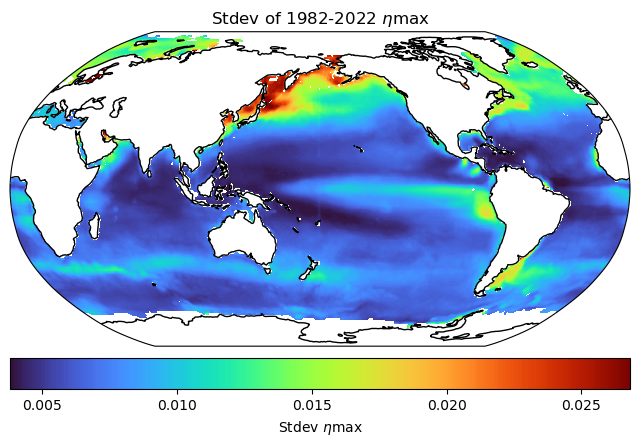

In [201]:
# Figure 6b: Standard deviations of observed values from 1982-2022
# Robinson map of the sine-regression amplitude values of pCO2_bio
import cartopy.crs as ccrs

plt.figure(figsize=(8, 5))
X = np.squeeze(ds_dict['x'])
Y = np.squeeze(ds_dict['y'])
# Z = nrmse_scen1.copy()
Z = np.nanstd(ds_dict["etamax_obs"],0)
# Z = ds_dict["FCO2_scen1"][0,:,:]
# cosmetic trim of the extreme tails of Z for better color contrast in the map plot
zmin = np.nanpercentile(Z,0.1)
zmax = np.nanpercentile(Z,99.9)
Z[Z<zmin]=zmin
Z[Z>zmax]=zmax
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.coastlines()
# ax.gridlines()
plt.title(r'Stdev of 1982-2022 $\eta$max')
# plt.contourf(X,Y,Z,cmap='turbo',levels=256,vmin=zmin,vmax=zmax,transform=ccrs.PlateCarree());
plt.contourf(X,Y,Z,cmap='turbo',levels=256,transform=ccrs.PlateCarree());
# plt.colorbar(orientation="horizontal", pad=0.03,label='NRMSD CO2 flux (%)',ticks=[0,25,50,75,100,125,150,175,200]);
plt.colorbar(orientation="horizontal", pad=0.03,label=r'Stdev $\eta$max',ticks=[.005,.01,.015,.02,.025]);
plt.savefig('Fig6b_map_of_etamax_stdev_v04.png', format='png', dpi=300)
plt.show()

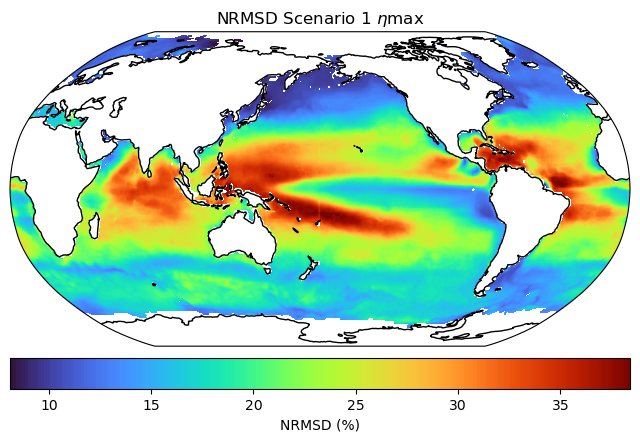

In [204]:
# Figure 6c: NRMSD of Scenario 1
# Robinson map of the sine-regression amplitude values of pCO2_bio
import cartopy.crs as ccrs

plt.figure(figsize=(8, 5))
X = np.squeeze(ds_dict['x'])
Y = np.squeeze(ds_dict['y'])
# Z = nrmse_scen1.copy()
Z = nrmse_scen1.copy()
# Z = ds_dict["FCO2_scen1"][0,:,:]
# cosmetic trim of the extreme tails of Z for better color contrast in the map plot
zmin = np.nanpercentile(Z,0.1)
zmax = np.nanpercentile(Z,99.9)
Z[Z<zmin]=zmin
Z[Z>zmax]=zmax
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.coastlines()
# ax.gridlines()
plt.title(r'NRMSD Scenario 1 $\eta$max')
# plt.contourf(X,Y,Z,cmap='turbo',levels=256,vmin=zmin,vmax=zmax,transform=ccrs.PlateCarree());
plt.contourf(X,Y,Z,cmap='turbo',levels=256,transform=ccrs.PlateCarree());
# plt.colorbar(orientation="horizontal", pad=0.03,label='NRMSD CO2 flux (%)',ticks=[0,25,50,75,100,125,150,175,200]);
plt.colorbar(orientation="horizontal", pad=0.03,label=r'NRMSD (%)',ticks=[10,15,20,25,30,35]);
plt.savefig('Fig6c_map_of_etamax_NRMSD_scen1_v04.png', format='png', dpi=300)
plt.show()

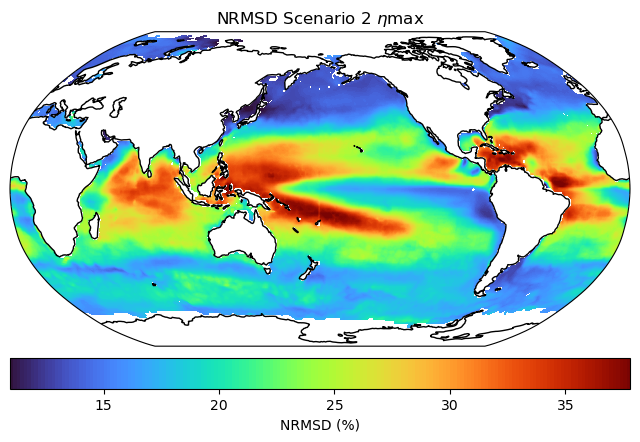

In [205]:
# Figure 6d: NRMSD of Scenario 2
# Robinson map of the sine-regression amplitude values of pCO2_bio
import cartopy.crs as ccrs

plt.figure(figsize=(8, 5))
X = np.squeeze(ds_dict['x'])
Y = np.squeeze(ds_dict['y'])
# Z = nrmse_scen1.copy()
Z = nrmse_scen2.copy()
# Z = ds_dict["FCO2_scen1"][0,:,:]
# cosmetic trim of the extreme tails of Z for better color contrast in the map plot
zmin = np.nanpercentile(Z,0.1)
zmax = np.nanpercentile(Z,99.9)
Z[Z<zmin]=zmin
Z[Z>zmax]=zmax
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
ax.set_global()
ax.coastlines()
# ax.gridlines()
plt.title(r'NRMSD Scenario 2 $\eta$max')
# plt.contourf(X,Y,Z,cmap='turbo',levels=256,vmin=zmin,vmax=zmax,transform=ccrs.PlateCarree());
plt.contourf(X,Y,Z,cmap='turbo',levels=256,transform=ccrs.PlateCarree());
# plt.colorbar(orientation="horizontal", pad=0.03,label='NRMSD CO2 flux (%)',ticks=[0,25,50,75,100,125,150,175,200]);
plt.colorbar(orientation="horizontal", pad=0.03,label=r'NRMSD (%)',ticks=[10,15,20,25,30,35]);
plt.savefig('Fig6d_map_of_etamax_NRMSD_scen2_v04.png', format='png', dpi=300)
plt.show()